# Lab. \#1: ${\tt Julia}$ Onramp
---

### GOALS
- Enter commands in ${\tt Julia}$ REPL to create variables and perform calculations;
- Write and save programs;
- Use indexing to extract and modify rows, columns, and elements of ${\tt Julia}$ tensors.

${\tt Julia}$ is a standalone program which can be downloaded from [https://julialang.org/downloads/](https://julialang.org/downloads/)

**Getting around**

By default, Julia runs in an interactive terminal called the REPL. In this mode, Some useful commands are:
1. `^C` aborts execution
1. `^D` exits Julia
1. `?` enters help mode
1. `;` enters system shell mode
1. `]` enters package manager mode
1. `^l` clears screen

We begin first by activating the environement within the desired folder.

From the REPL interface, either type
```julia
using Pkg  
pkg"activate ."
```
or access the package mode by typing `]` and simply write
```julia
activate .
```
Always within the package mode, to see the full list of installed packages
```julia
st
```

In [ ]:
using Pkg
pkg"activate ."

In [ ]:
]st

To add the **Markdown** package for instance, we write

In [ ]:
]add Markdown

To be able to use it, we do as follows

In [4]:
using Markdown

In [5]:
md"""
This a text inside a code cell, thanks to **Markdown** package. I can _emphasize_ anything. Make other things **bold**
"""

This a text inside a code cell, thanks to **Markdown** package. I can *emphasize* anything. Make other things **bold**


Runnig `Julia` in Jupyer Notebookor Jupyter Lab is pretty handy. We only need to install the appropriate kernel. In order to add `Julia` kernel `IJulia` to Jupyter Notebook and/or `JupyterLab` IDEs, we begin by executing the following commands:
```julia
using Pkg  
Pkg.add("IJulia")
```
If we want to get `JupyterLab` instance running in current directory, we can do:
```julia
jupyterlab(dir=pwd(), detached=true)
```

In case things do not work, we run the two following commands from ${\tt Julia}$ REPL which launch jupyter environment.
```julia
using IJulia  
installkernel("Julia")
```

The shell mode is also available through the REPL to evaluate some os commands. To do so, simply preface the regular command by semicolon. For instance, `pwd` prints the path to working directory and `ls` allows to list the content of the current directory.

In [6]:
;pwd

/home/mhamdi/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-1


In [ ]:
;ls -la

### Getting Help
In order to seek help on a particular function. We just use the `?` mark. We can use the ${\tt Julia}$ documentation to discover more pieces of information about ${\tt Julia}$ features.

In [8]:
?cos

search: cos cosd acos cosc cosh cis cot acosh close cospi acosd const coth copy



```
cos(x)
```

Compute cosine of `x`, where `x` is in radians.

See also [`cosd`](@ref), [`cospi`](@ref), [`sincos`](@ref), [`cis`](@ref).

---

```
cos(A::AbstractMatrix)
```

Compute the matrix cosine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the cosine. Otherwise, the cosine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> cos(fill(1.0, (2,2)))
2×2 Matrix{Float64}:
  0.291927  -0.708073
 -0.708073   0.291927
```


To print something on the standard output, it is possible to use either `print` and `println`. The last one displays the text and moves the cursor to the next line.

In [9]:
print("Hello")
print(' ')
print("World")

Hello World

In [10]:
println("Hello")
println("World")

Hello
World


**Data types: Dictionaries**

In [11]:
dict = Dict(
    # Name => # of wheels
    "Unicycle" => 1,
    "Bicycle" => 2,
    "Tricycle" => 3
)

Dict{String, Int64} with 3 entries:
  "Bicycle"  => 2
  "Tricycle" => 3
  "Unicycle" => 1

In [12]:
typeof(dict)

Dict{String, Int64}

In [13]:
dict = Dict([("Unicycle", 1), ("Bicycle", 2), ("Tricycle", 3)])

Dict{String, Int64} with 3 entries:
  "Bicycle"  => 2
  "Tricycle" => 3
  "Unicycle" => 1

In [14]:
dict["Bicycle"]

2

In [15]:
lst = [1, 'a', "abc", true, [0, .5im]]

5-element Vector{Any}:
    1
     'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
     "abc"
 true
     ComplexF64[0.0 + 0.0im, 0.0 + 0.5im]

In [16]:
typeof(lst)

Vector{Any} (alias for Array{Any, 1})

In [17]:
lst[end]

2-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.5im

### Basic Calculations

In [18]:
a, b = 1, 1.5

(1, 1.5)

In [19]:
println(typeof(a))
println(typeof(b))

Int64
Float64


In [20]:
md"""
`varinfo` method allows to display loaded variables.
"""

`varinfo` method allows to display loaded variables.


In [21]:
varinfo()

| name           |      size | summary                                  |
|:-------------- | ---------:|:---------------------------------------- |
| Base           |           | Module                                   |
| Core           |           | Module                                   |
| Main           |           | Module                                   |
| PLOTS_DEFAULTS | 384 bytes | Dict{Symbol, Symbol} with 1 entry        |
| a              |   8 bytes | Int64                                    |
| b              |   8 bytes | Float64                                  |
| dict           | 431 bytes | Dict{String, Int64} with 3 entries       |
| docs           | 6.466 KiB | Markdown.MD                              |
| lst            | 176 bytes | 5-element Vector{Any}                    |
| showall        |   0 bytes | showall (generic function with 1 method) |


In [22]:
?varinfo

search: varinfo @info versioninfo



```
varinfo(m::Module=Main, pattern::Regex=r""; all=false, imported=false, recursive=false, sortby::Symbol=:name, minsize::Int=0)
```

Return a markdown table giving information about public global variables in a module, optionally restricted to those matching `pattern`.

The memory consumption estimate is an approximate lower bound on the size of the internal structure of the object.

  * `all` : also list non-public objects defined in the module, deprecated objects, and compiler-generated objects.
  * `imported` : also list objects explicitly imported from other modules.
  * `recursive` : recursively include objects in sub-modules, observing the same settings in each.
  * `sortby` : the column to sort results by. Options are `:name` (default), `:size`, and `:summary`.
  * `minsize` : only includes objects with size at least `minsize` bytes. Defaults to `0`.

The output of `varinfo` is intended for display purposes only.  See also [`names`](@ref) to get an array of symbols defined in a module, which is suitable for more general manipulations.


In [23]:
println("Sum of $a and $b is $(a+b)")

Sum of 1 and 1.5 is 2.5


Addition, subtraction, multiplication, division, exponent

In [24]:
a+b, a-b, a*b, a÷b, a^b

(2.5, -0.5, 1.5, 0.0, 1.0)

In [25]:
md"""
**Unicode support** 
1. We can use π instead of `pi`
1. Greek letters improe comprehension: α _(alpha)_, β _(beta)_, ...
1. Symbols: ≥ _(>=)_, ≤ _(<=)_, ∈ _(in)_, ... 
1. ...
"""

**Unicode support** 

1. We can use π instead of `pi`
2. Greek letters improe comprehension: α *(alpha)*, β *(beta)*, ...
3. Symbols: ≥ *(>=)*, ≤ *(<=)*, ∈ *(in)*, ...
4. ...


In [26]:
3 ≤ π 

true

In [27]:
typeof(3.14)

Float64

In [28]:
Float64 |> supertype |> supertype |> supertype |> supertype 

Any

In [29]:
Integer |> subtypes

3-element Vector{Any}:
 Bool
 Signed
 Unsigned

In [30]:
Signed |> subtypes

6-element Vector{Any}:
 BigInt
 Int128
 Int16
 Int32
 Int64
 Int8

In [31]:
UInt8 <: Unsigned # UInt8 is one subtype of Unsigned

true

In [32]:
Signed >: Int8 # Signed is supertype of Int8

true

In [33]:
typeof(3)

Int64

In [34]:
tmp::UInt8 = 3
typeof(tmp)

UInt8

### Mathematical Notation


In [35]:
println(1+2)
println(+(1, 2))

3
3


In [36]:
println(1-2)
println(-(1, 2))

-1
-1


In [37]:
println(1*2)
println(*(1, 2))

2
2


In [38]:
println(1/2)
println(/(1, 2))

0.5
0.5


In [39]:
println(3/4+7/5)
println(3//4+7//5)

2.15
43//20


### Array Transformations
Perform calculations on entire arrays at once.

In [40]:
zeros(3, 2)

3×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [41]:
ones(3, 3, 2)

3×3×2 Array{Float64, 3}:
[:, :, 1] =
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

[:, :, 2] =
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [42]:
fill(π, (2, 2))

2×2 Matrix{Irrational{:π}}:
 π  π
 π  π

In [43]:
π .* ones(2, 2)

2×2 Matrix{Float64}:
 3.14159  3.14159
 3.14159  3.14159

In [44]:
md"Creates a `BitArray` with all values set to `true`"

Creates a `BitArray` with all values set to `true`


In [45]:
var = trues(2, 4)
println(var)
typeof(var)

Bool[1 1 1 1; 1 1 1 1]


BitMatrix (alias for BitArray{2})

In [46]:
md"Creates a `BitArray` with all values set to `false`"

Creates a `BitArray` with all values set to `false`


In [47]:
var = falses(2, 4)
println(var)
typeof(var)

Bool[0 0 0 0; 0 0 0 0]


BitMatrix (alias for BitArray{2})

In [48]:
md"**Comprehension**"

**Comprehension**


In [49]:
str = "Hello Julia"
[println(el) for el in str];

H
e
l
l
o
 
J
u
l
i
a


### Calling Functions
Call functions to obtain multiple outputs.

In [50]:
md"""
[Functions in ${\tt Julia}$](https://docs.julialang.org/en/v1/manual/functions/)
"""

[Functions in ${\tt Julia}$](https://docs.julialang.org/en/v1/manual/functions/)


In [51]:
md"**Spreading Arguments**"

**Spreading Arguments**


_Optional positional arguments_

In [52]:
foo(x=0, y=0, z=0) = x+y+z

foo (generic function with 4 methods)

In [53]:
foo(), foo(1, 2, 3)

(0, 6)

In [54]:
foo([1, 2, 3]...) # Splat `...` operator

6

_Keywords arguments_

In [55]:
bar(; a::Real=0, b::Real=0, c::Real=0) = a+b+c

bar (generic function with 1 method)

In [56]:
bar()

0

In [57]:
bar(; Dict(:a => 3, :b => 5.4, :c => -1.2)... ) # ; kwargs...

7.2

In [58]:
# THROW AN ERROR 
try bar([1, 2, 3]...)
catch error
    println(error)
end

MethodError(Main.bar, (1, 2, 3), 0x000000000000683c)


In [59]:
md"**Multiple Dispatch**"

**Multiple Dispatch**


In [60]:
# 1st method signature
function f(x::Int)
    x^2
end

f (generic function with 1 method)

In [61]:
# 2nd method signature
f(x::Float64) = x^2+1

f (generic function with 2 methods)

In [62]:
# 3rd method signature
f(x::Char) = x*'y'*'z'
# 4th mehod signature
f(x::String) = x*x 

f (generic function with 4 methods)

In [63]:
methods(f)

# 4 methods for generic function "f" from Main:
 [1] f(x::String)
     @ In[62]:4
 [2] f(x::Char)
     @ In[62]:2
 [3] f(x::Float64)
     @ In[61]:2
 [4] f(x::Int64)
     @ In[60]:2

In [64]:
f(1), f(1.), f('x'), f("abc")

(1, 2.0, "xyz", "abcabc")

In [65]:
mycos(x) = cos(x)
mycos(adj, hyp) = adj/hyp # Extension to `mycos` function

mycos (generic function with 2 methods)

In [66]:
methods(mycos)

# 2 methods for generic function "mycos" from Main:
 [1] mycos(adj, hyp)
     @ In[65]:2
 [2] mycos(x)
     @ In[65]:1

In [67]:
@which mycos(π)

mycos(x)
     @ Main In[65]:1

In [68]:
@which mycos(5, 3)

mycos(adj, hyp)
     @ Main In[65]:2

In [69]:
mycos(adj, hyp=10) = adj/hyp

mycos (generic function with 2 methods)

In [70]:
@which mycos(π)

mycos(adj)
     @ Main In[69]:1

**Function Chaining** applies a function to the preceding argument.

In [71]:
g(x) = x+1
h(x) = x^2
x = 2 |> g |> h

9

In [72]:
md"Another pssible way is t use `∘`_\circ{tab}_ symbol"

Another pssible way is t use `∘`*\circ{tab}* symbol


In [73]:
(h∘g)(2)

9

In [74]:
md"Definition of a function can be done on the fly"

Definition of a function can be done on the fly


In [75]:
y = 5 |> (x->x^2) |> √

5.0

In [76]:
md"""
**Metaprogramming:** Code is optimized by nature in ${\tt Julia}$
"""

**Metaprogramming:** Code is optimized by nature in ${\tt Julia}$


In [77]:
function Foo(x::Integer)
    y = x
    for i=1:100
        y += i^2
    end
    return y
end

Foo (generic function with 1 method)

In [78]:
@code_llvm Foo(3)

; Function Signature: Foo(Int64)
;  @ In[77]:1 within `Foo`
define i64 @julia_Foo_19508(i64 signext %"x::Int64") #0 {
top:
  %0 = add i64 %"x::Int64", 338350
;  @ In[77]:6 within `Foo`
  ret i64 %0
}


In [79]:
?@code_llvm

```
@code_llvm
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_llvm`](@ref) on the resulting expression. Set the optional keyword arguments `raw`, `dump_module`, `debuginfo`, `optimize` by putting them and their value before the function call, like this:

```
@code_llvm raw=true dump_module=true debuginfo=:default f(x)
@code_llvm optimize=false f(x)
```

`optimize` controls whether additional optimizations, such as inlining, are also applied. `raw` makes all metadata and dbg.* calls visible. `debuginfo` may be one of `:source` (default) or `:none`,  to specify the verbosity of code comments. `dump_module` prints the entire module that encapsulates the function.

See also: [`code_llvm`](@ref), [`@code_warntype`](@ref), [`@code_typed`](@ref), [`@code_lowered`](@ref), [`@code_native`](@ref).


### Plotting Data
Visualize variables using ${\tt Julia}$'s plotting functions.

In [ ]:
]add Plots

In [81]:
using Plots # GR is the default backend

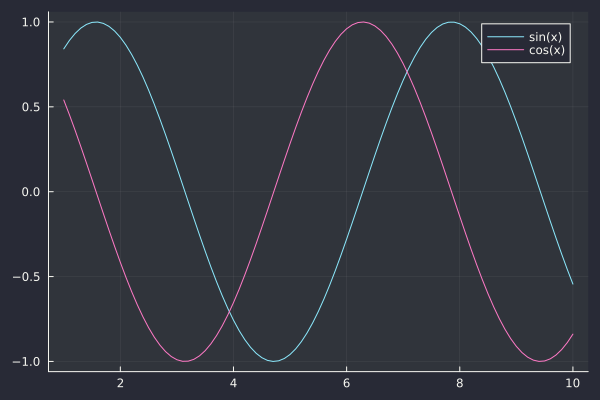

In [82]:
x = 1:.1:10
y = sin.(x)
z = cos.(x)

plot(x, y, label="sin(x)")
plot!(x, z, label="cos(x)") # Hold on the previous plot

In [83]:
md"**Scatter Plot**"

**Scatter Plot**


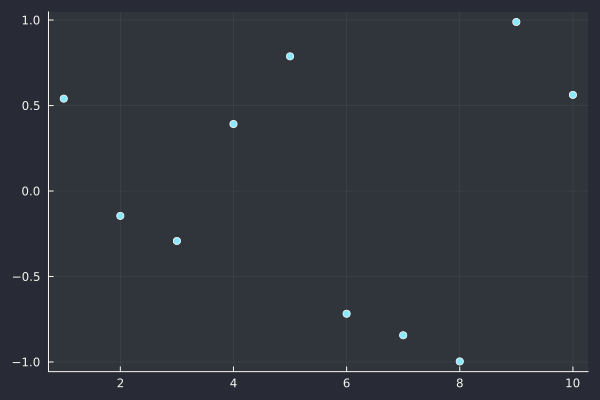

In [84]:
x = range(1, 10)
y = cos.(x.^3)
scatter(x, y, legend=false)

In [85]:
md"**Uniform Distribtion**"

**Uniform Distribtion**


In [86]:
?rand;

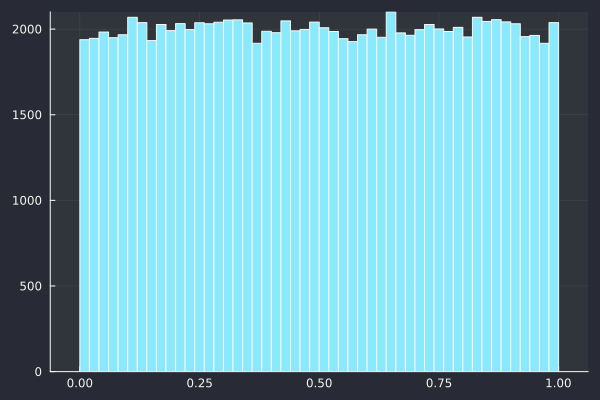

In [87]:
x = rand(10^5)
histogram(x, bins=64, legend=false)

In [88]:
md"**Normal Distribution**"

**Normal Distribution**


In [89]:
?randn;

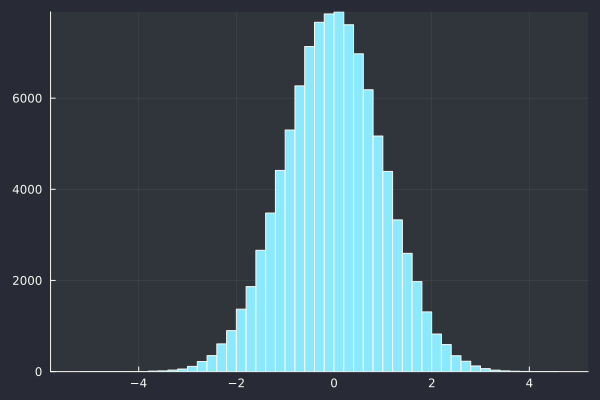

In [90]:
x = randn(10^5)
histogram(x, bins=64, legend=false)

In [91]:
md"**Histogram in 2D**"

**Histogram in 2D**


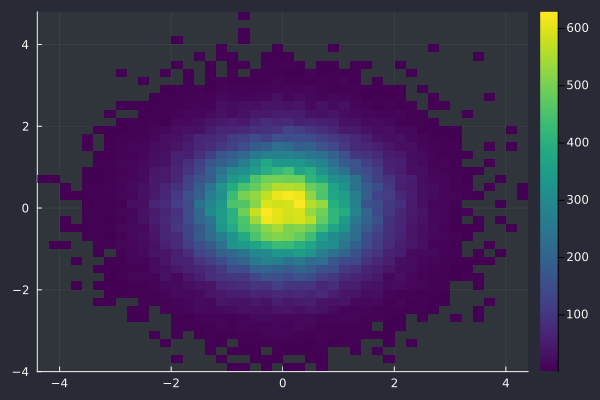

In [92]:
x = randn(10^5)
y = randn(10^5)
histogram2d(x, y, bins=(64, 64))

### Importing Data
Bring data from external files into ${\tt Julia}$.

Data is typically stored in files, such as _CSV_ or _JSON_ files. In order to train and test machine learning models, the data needs to be loaded into the program. Additionally, the results of the training and testing process, such as model weights and performance metrics, also need to be saved to files. Therefore, the ability to manipulate files is essential for loading and saving data and model information in the machine learning process.

In [93]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-1/Project.toml`
  No Changes to `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-1/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-1/Project.toml`
  No Changes to `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-1/Manifest.toml`


In [94]:
md"Create new CSV file"

Create new CSV file


In [95]:
using CSV, DataFrames

In [96]:
md"`touch` command allows to create a file if it doesn't exist. Otherwise, it changes the file timestamps."

`touch` command allows to create a file if it doesn't exist. Otherwise, it changes the file timestamps.


In [97]:
touch("test-file.csv")

"test-file.csv"

In [98]:
;ls -la test-file.csv

-rw-rw-r-- 1 mhamdi mhamdi 66 Nov  7 18:47 test-file.csv


In [99]:
file = open("test-file.csv", "w")

IOStream(<file test-file.csv>)

In [100]:
md"Let's create some imaginary data"

Let's create some imaginary data


In [101]:
df = DataFrame(
        Student = ["Mohamed", "Aymen", "Rami", "Ala"],
        Id = [1, 2, 3, 4],
        Marks = [18, 7, 12, 5.5]
        )

Row,Student,Id,Marks
,String,Int64,Float64
1,Mohamed,1,18.0
2,Aymen,2,7.0
3,Rami,3,12.0
4,Ala,4,5.5


In [102]:
md"Write `df` to file"

Write `df` to file


In [103]:
CSV.write("test-file.csv", df)

"test-file.csv"

In [104]:
md"Open the CSV file and add some contents. See what happens when we load it again."

Open the CSV file and add some contents. See what happens when we load it again.


In [105]:
CSV.read("test-file.csv", DataFrame)

Row,Student,Id,Marks
,String7,Int64,Float64
1,Mohamed,1,18.0
2,Aymen,2,7.0
3,Rami,3,12.0
4,Ala,4,5.5


### Logical Arrays
Use logical expressions to help extracting elements of interest from ${\tt Julia}$ arrays.

In [106]:
x = [1, 2, -5, 7.2, 3im]
println(x)
typeof(x)

ComplexF64[1.0 + 0.0im, 2.0 + 0.0im, -5.0 + 0.0im, 7.2 + 0.0im, 0.0 + 3.0im]


Vector{ComplexF64} (alias for Array{Complex{Float64}, 1})

In [107]:
idx = [false, true, false, false, true]
print(x[idx])

ComplexF64[2.0 + 0.0im, 0.0 + 3.0im]

In [108]:
M = Array{Float64, 2}(undef, 5, 4)

5×4 Matrix{Float64}:
 6.11853e-310  6.11857e-310  6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310  6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310  6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310  6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310  6.11857e-310  6.11857e-310

In [109]:
row_idx = [true, false, true, true, false];
col_idx = [false, true, true, false];

In [110]:
M[row_idx, :]

3×4 Matrix{Float64}:
 6.11853e-310  6.11857e-310  6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310  6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310  6.11857e-310  6.11857e-310

In [111]:
M[:, col_idx]

5×2 Matrix{Float64}:
 6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310

In [112]:
M[row_idx, col_idx]

3×2 Matrix{Float64}:
 6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310
 6.11857e-310  6.11857e-310

### Programming
Write programs that execute code based on some condition.

In [113]:
md"**Conditional Evaluation**"

**Conditional Evaluation**


In [114]:
a, b = π, π
if a < b
    println("$a is less than $b")
elseif a > b
    println("$a is greater than $b")
else
    println("$a is equal to $b")
end

π is equal to π


In [115]:
md"**`While` Loop**"

**`While` Loop**


In [116]:
fruits = ["Blueberry", "Orange", "Banana", "Raspberry", "Strawberry"]
iter = 1
while iter ≤ length(fruits)
    println("Item #$iter is $(fruits[iter])")
    iter +=1
end

Item #1 is Blueberry
Item #2 is Orange
Item #3 is Banana
Item #4 is Raspberry
Item #5 is Strawberry


In [117]:
md"**`For` Loop**"

**`For` Loop**


In [118]:
vegetables = ["Broccoli", "Garlic", "Mushrooms", "Potatoes", "Tomatoes"]
i = 1
for item in vegetables
    println("Item #$i is $item")
    i += 1
end

Item #1 is Broccoli
Item #2 is Garlic
Item #3 is Mushrooms
Item #4 is Potatoes
Item #5 is Tomatoes


### Final Project
Bring together concepts that you have learned with a project.

This simple project consists of implementing a basic calculator. This latter could have the ability to perform basic arithmetic operations like _addition_, _subtraction_, _multiplication_, and _division_.

Here are the steps to be followed:
1. Create a function called `calculator()` that takes two arguments, `x` and `y`, and a char operation that specifies which operation to perform.
1. Use an `if-else` statement to check the value of operation. Depending on the value of operation, call the appropriate function to perform the calculation.
1. Test the calculator function by calling it with different values for `x`, `y`, and operation and printing the result.
1. Once the basic calculator is working, we can improve it by adding more functionality such as handling decimals and negative numbers, or implementing more advanced operations such as square root, power, trigonometry and so on.
1. Finally, we could also experiment with different input types, such as command line arguments or a graphical user interface.

In [119]:
md"Here is an example of how the basic calculator function could look like:"

Here is an example of how the basic calculator function could look like:


In [120]:
function calculator(x::Number, y::Number, op::Char)
    if op == '+'
        return x + y
    elseif op == '-'
        return x - y
    elseif op == '*'
        return x * y
    elseif op in ['/', '÷']
        return x / y
    else
        return "INVALID OPERATION"
    end
end

calculator (generic function with 1 method)

In [121]:
println("Summation is $(calculator(5, 3, '+'))")
println("Subtraction is $(calculator(5, 3, '-'))")
println("Multiplication is $(calculator(5, 3, '*'))")
println("Division is $(calculator(5, 3, '÷'))")
println(calculator(5, 3, '×'))

Summation is 8
Subtraction is 2
Multiplication is 15
Division is 1.6666666666666667
INVALID OPERATION


**Miscallenous**

In [122]:
md"Check your version of Julia"
versioninfo()

Julia Version 1.11.1
Commit 8f5b7ca12ad (2024-10-16 10:53 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 8 × Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 8 virtual cores)
Environment:
  LD_LIBRARY_PATH = /home/mhamdi/torch/install/lib:
  DYLD_LIBRARY_PATH = /home/mhamdi/torch/install/lib:
  JULIA_NUM_THREADS = 8


In [123]:
md"The macro `@edit` shows the defintion of a function when invoked with specific arguments"
# @edit maximum([-1, 0, 1])

The macro `@edit` shows the defintion of a function when invoked with specific arguments


In [124]:
md"`varinfo` lists all global variables and their corresponding types in the current scope"
varinfo()

| name           |        size | summary                                     |
|:-------------- | -----------:|:------------------------------------------- |
| Base           |             | Module                                      |
| Core           |             | Module                                      |
| Foo            |     0 bytes | Foo (generic function with 1 method)        |
| M              |   208 bytes | 5×4 Matrix{Float64}                         |
| Main           |             | Module                                      |
| PLOTS_DEFAULTS |   384 bytes | Dict{Symbol, Symbol} with 1 entry           |
| a              |     0 bytes | Irrational{:π}                              |
| b              |     0 bytes | Irrational{:π}                              |
| bar            |     0 bytes | bar (generic function with 1 method)        |
| calculator     |     0 bytes | calculator (generic function with 1 method) |
| col_idx        |    44 bytes | 4-element Vector{Bool}                      |
| df             |   827 bytes | 4×3 DataFrame                               |
| dict           |   431 bytes | Dict{String, Int64} with 3 entries          |
| docs           |   7.438 KiB | Markdown.MD                                 |
| f              |     0 bytes | f (generic function with 4 methods)         |
| file           |   380 bytes | IOStream                                    |
| foo            |     0 bytes | foo (generic function with 4 methods)       |
| fruits         |   160 bytes | 5-element Vector{String}                    |
| g              |     0 bytes | g (generic function with 1 method)          |
| h              |     0 bytes | h (generic function with 1 method)          |
| i              |     8 bytes | Int64                                       |
| idx            |    45 bytes | 5-element Vector{Bool}                      |
| iter           |     8 bytes | Int64                                       |
| lst            |   176 bytes | 5-element Vector{Any}                       |
| mycos          |     0 bytes | mycos (generic function with 2 methods)     |
| row_idx        |    45 bytes | 5-element Vector{Bool}                      |
| showall        |     0 bytes | showall (generic function with 1 method)    |
| str            |    19 bytes | 11-codeunit String                          |
| tmp            |      1 byte | UInt8                                       |
| var            |    80 bytes | 2×4 BitMatrix                               |
| vegetables     |   159 bytes | 5-element Vector{String}                    |
| x              |   120 bytes | 5-element Vector{ComplexF64}                |
| y              | 781.289 KiB | 100000-element Vector{Float64}              |
| z              |   768 bytes | 91-element Vector{Float64}                  |


_Modules_

In [125]:
module MyModule
export a
a = 0
b = true
end

Main.MyModule

In [126]:
varinfo(MyModule)

| name     |      size | summary |
|:-------- | ---------:|:------- |
| MyModule | 2.234 KiB | Module  |
| a        |   8 bytes | Int64   |


In [127]:
a

π = 3.1415926535897...

In [128]:
MyModule.a

0

In [129]:
MyModule.b

true

In [130]:
using .MyModule

In [131]:
a, b

(π, π)

In [132]:
using .MyModule: b

In [133]:
b

π = 3.1415926535897...